# ECG

#### Coleta: 15/10/2021
#### Tratamento: 16/10/2021
#### Simulador – 60 bpm

## Descrição

#### As medidas foram coletadas a partir do simulador ECG Medsystem Hospitalar. Os dados são coletados pelo sensor AD8232 e transmitidos via Bluetooth para o computador.

In [1]:
# Importando as bibliotecas
import heartpy as hp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Definindo a taxa de amostragem
sample_rate = 191

### Apresentação dos dados

In [3]:
data = hp.get_data('ecg_simulador_15-10_1.txt')

In [4]:
df = pd.DataFrame(data)
df

,0
0,394.0
1,393.0
2,386.0
3,399.0
4,402.0
...,...
11623,377.0
11624,378.0
11625,381.0
11626,382.0


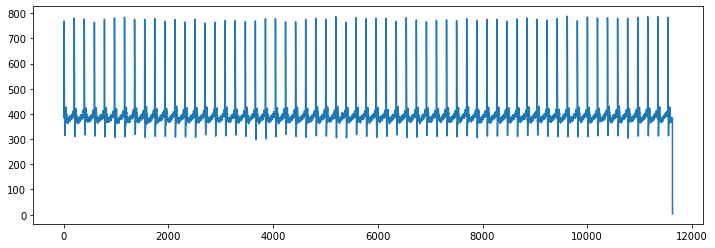

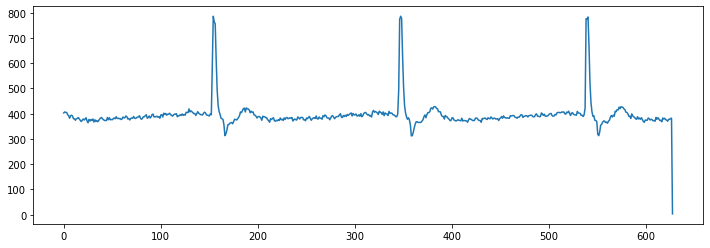

In [9]:
plt.figure(figsize=(12,4))
plt.plot(data)
plt.show()

plt.figure(figsize=(12,4))
plt.plot(data[11000:])
plt.show()

In [14]:
data_wn = data[:11600]
data_wn

array([394., 393., 386., ..., 369., 366., 375.])

In [17]:
def minmax_norm(data_input):
    return (data_input - data_input.min()) / (data_input.max() - data_input.min())

data_norm = minmax_norm(data_wn)

print(data_norm)

[0.19591837 0.19387755 0.17959184 ... 0.14489796 0.13877551 0.15714286]


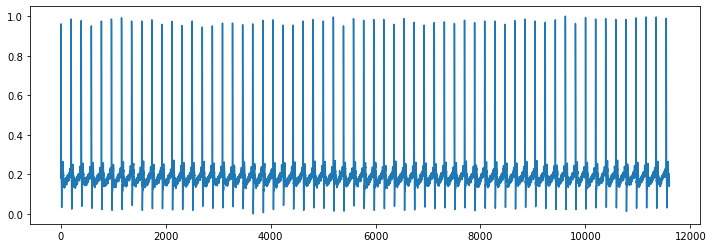

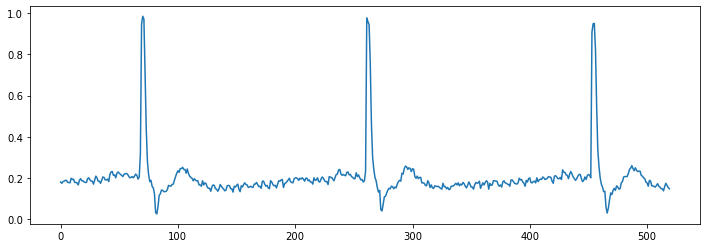

In [32]:
plt.figure(figsize=(12,4))
plt.plot(data_norm)
plt.show()

plt.figure(figsize=(12,4))
plt.plot(data_norm[130:650])
plt.show()

bpm: 59.624339
ibi: 1006.300470
sdnn: 5.171285
sdsd: 4.563721
rmssd: 8.695862
pnn20: 0.000000
pnn50: 0.000000
hr_mad: 5.235602
sd1: 6.147577
sd2: 3.951267
s: 76.311550
sd1/sd2: 1.555850
breathingrate: 0.266667


C:\Users\Lucia\Anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 864x288 with 0 Axes>

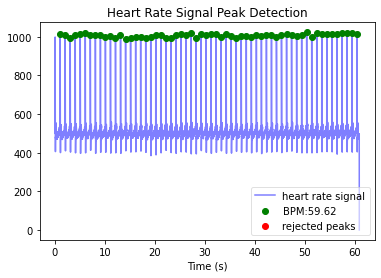

In [13]:
# Análise
wd, m = hp.process(hp.scale_data(data), sample_rate)

plt.figure(figsize=(12,4))
hp.plotter(wd, m)

# Mostrar as medidas computadas
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))